<a href="https://colab.research.google.com/github/sandralayas/My-Works/blob/Artificial-Intelligence/movies_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import os
from IPython.display import FileLink
import re
import time

In [145]:
# url = 'https://www.imdb.com/search/title/?title_type=feature&genres=horror'
url='https://www.imdb.com/search/title/?title_type=feature&countries=IN&languages=ml'

In [146]:
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}
page = requests.get(url, headers=HEADERS)
soup = BeautifulSoup(page.content, "html.parser")

In [147]:
# standard
title_list=[]
year_list=[]
duration_list=[]
rated_list=[]
rating_list=[]

def fetch_movies(soup,title_list,year_list,duration_list,rated_list,rating_list):
  for i in soup.find_all('a',class_="ipc-title-link-wrapper"):
    title=i.get_text(strip=True)
    title=title[title.index('.')+2:]
    title_list.append(title)

  year_rated_duration=(soup.find_all('span',class_="sc-b189961a-8 kLaxqf dli-title-metadata-item"))

  for each in range(len(year_rated_duration)-3):
    year=year_rated_duration[each].get_text(strip=True)
    duartion=year_rated_duration[each+1].get_text(strip=True)
    rated=year_rated_duration[each+2].get_text(strip=True)

    if year.isnumeric()==False:pass
    else:
      year_list.append(year)
      if 'h' and 'm' in duartion:duration_list.append(duartion)
      else:duration_list.append(None)
      if rated in ['Aprroved','NC-17','TV-MA','G','PG','PG-13','R']:rated_list.append(rated)
      else:rated_list.append(None)

  # for i in soup.find_all('span',class_="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating"):
  #   rating=i.get_text('aria-label')
  #   if rating==None:rating_list.append(None)
  #   else:rating_list.append(rating)

  return title_list,year_list,duration_list,rated_list,rating_list

title_list,year_list,duration_list,rated_list,rating_list=fetch_movies(soup,title_list,year_list,duration_list,rated_list,rating_list)

# multiple pages

# for page_number in range(1,10):
#     multi_url = f"{url}&start={(page_number - 1) * 50}"
#     response = requests.get(multi_url)
#     soup1 = BeautifulSoup(response.content, "html.parser")
#     a,b,c,d,e = fetch_movies(soup1,title_list=title_list,year_list=year_list,duration_list=duration_list,rated_list=rated_list,rating_list=rating_list)
#     title_list=title_list+a
#     year_list=year_list+b
#     duration_list=duration_list+c
#     rated_list=rated_list+d
#     rating_list=rating_list+e
#     time.sleep(2)  # Sleep to avoid getting blocked

# for page in range(1, 3 + 1):
#     start = (page - 1) * 50 + 1
#     page_url = f"{url}&start={start}"
#     # print(f"Scraping page {page}: {page_url}")
#     a,b,c,d,e = fetch_movies(soup,title_list,year_list,duration_list,rated_list,rating_list)
#     title_list=title_list+a
#     year_list=year_list+b
#     duration_list=duration_list+c
#     rated_list=rated_list+d
#     rating_list=rating_list+e
#     time.sleep(2)  # Sleep to avoid getting blocked

In [148]:
movies_list=soup.find_all('a',class_='ipc-title-link-wrapper')
sub_links=[]
for each in movies_list:
  sub_links.append(each.get('href'))
# sub_links

In [149]:
rooturl='https://www.imdb.com'

In [150]:
from os import replace

# features to be extracted
## not in the top movies page
actor_list=[]
director_list=[]

# reviews for sentiment analysis
description_list=[]
comments_list=[]


for sub in sub_links:
  url=rooturl+sub
  HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}
  page = requests.get(url, headers=HEADERS)
  soup = BeautifulSoup(page.content, "html.parser")

  for cast in soup.find('a',class_='sc-bfec09a1-1 gCQkeh'):
    actor_list.append(cast.get_text(strip=True))

  for director in soup.find_all('a',class_="ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"):
    director_list.append(director.get_text(strip=True))


In [151]:
length=min(len(title_list),len(year_list),len(duration_list),len(rated_list),len(actor_list),len(director_list))#,len(rating_list))

# dealing length
title_list=title_list[:length]
year_list=year_list[:length]
duration_list=duration_list[:length]
rated_list=rated_list[:length]
rating_list=rating_list[:length]
actor_list=actor_list[:length]
director_list=director_list[:length]

# dealing none charecter
lists=[title_list,year_list,duration_list,rated_list,rating_list,director_list]
for col in lists:
  for row in col:
    if row==None:col[int(col.index(row))]='na'

data = pd.DataFrame()# title_list,year_list=year_list
data['Name']=title_list
data['Year']=year_list
data['Rated']=rated_list
data['Duration']=duration_list
# data['Rating']=rating_list
data['Actor']=actor_list
data['Director']=director_list
# data['Description']=description_list
# data['Comments']=comments_list
data.head()

,Name,Year,Rated,Duration,Actor,Director
0,Kalki 2898 AD,2024,na,na,Prabhas,Nag Ashwin
1,Maharaj,2024,TV-MA,2h 11m,Sharvari Wagh,Nag Ashwin
2,12th Fail,2023,na,2h 27m,Vikrant Massey,Prabhas
3,Manjummel Boys,2024,na,2h 15m,Soubin Shahir,Amitabh Bachchan
4,Maidaan,2024,na,3h 1m,Ajay Devgn,Kamal Haasan


In [152]:
data.to_csv('sample_data.csv', index=False)
FileLink('sample_data.csv')

/content/sample_data.csv

In [153]:
!pip install networkx

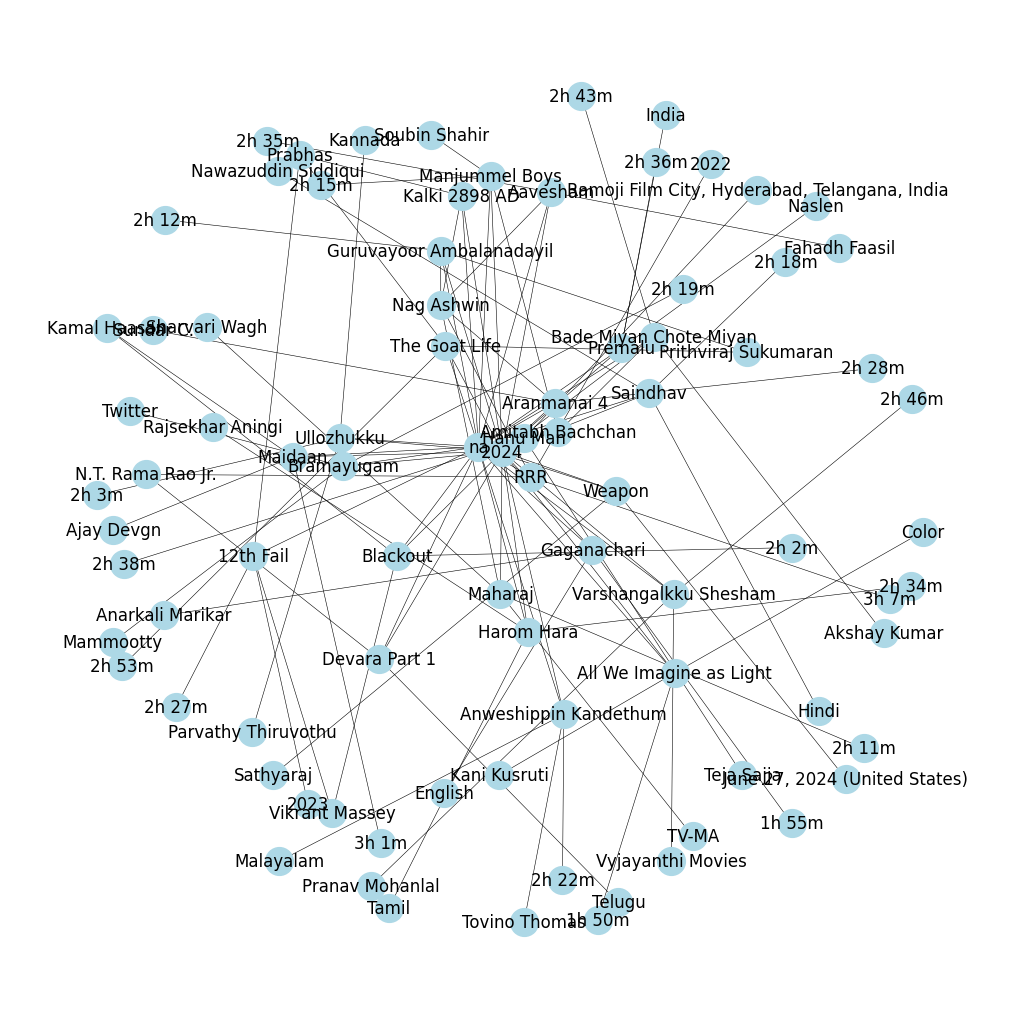

In [154]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.from_pandas_edgelist(data, 'Name', 'Actor')

year_edges = list(zip(data['Name'], data['Year']))
G.add_edges_from(year_edges)

rated_edges = list(zip(data['Name'], data['Rated']))
G.add_edges_from(rated_edges)

duration_edges = list(zip(data['Name'], data['Duration']))
G.add_edges_from(duration_edges)

director_edges = list(zip(data['Name'], data['Director']))
G.add_edges_from(director_edges)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.8)
nx.draw(G, pos, with_labels=True, node_size=400, width=0.4, node_color='lightblue')
plt.show()



In [155]:
import plotly.graph_objects as go
import networkx as nx

# Assuming you have already defined 'G' and 'pos'

# Add edges as disconnected lines in a single trace
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]] # G.nodes[edge[0]][pos]
    x1, y1 = pos[edge[1]] # G.nodes[edge[1]][pos]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Add nodes as a scatter trace
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node] # G.nodes[node][pos]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(thickness=15, title='Node Connections'),
    )
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace], layout=go.Layout(showlegend=False))

# Show the interactive plot
fig.show()

# **Rough Work ⬇**

# pyspark

In [156]:
!pip install pyspark

In [157]:
import pyspark.sql as sql
spark = (
    sql.SparkSession.builder.config("spark.driver.memory", "8g")
    .config("spark.sql.execution.arrow.pyspark.enable", "true")
    .config("spark.driver.maxResultSize", "2g")
    .getOrCreate()
)

In [158]:
df = spark.read.csv("sample_data.csv", inferSchema=True, header=True)
df.createOrReplaceTempView("graph")

In [159]:
!pip install pyproject.toml
!pip install cugraph

  Using cached cugraph-0.6.1.post1.tar.gz (1.1 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cugraph
  Running setup.py clean for cugraph
Failed to build cugraph
ERROR: Could not build wheels for cugraph, which is required to install pyproject.toml-based projects


# dataset creation ⬇

<a class="ipc-link ipc-link--baseAlt ipc-link--inherit-color" role="button" tabindex="0" aria-disabled="false" href="/title/tt22022452/releaseinfo?ref_=tt_ov_rdat">2024</a>

In [160]:
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}
page = requests.get('https://www.imdb.com/title/tt22022452/?ref_=sr_t_1', headers=HEADERS)
soup = BeautifulSoup(page.content, "html.parser")
year=(soup.find('a',href='/title/tt22022452/releaseinfo?ref_=tt_ov_rdat')).text
year

'2024'

In [161]:
url = "https://www.imdb.com/title/tt22022452/?ref_=nv_sr_srsg_0_tt_8_nm_0_in_0_q_insi"

In [162]:
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

In [163]:
page = requests.get(url, headers=HEADERS)
page

<Response [200]>

In [164]:
soup = BeautifulSoup(page.content, "html.parser")
# print(soup.prettify())

In [165]:
# scrap movie names
scraped = soup.find('title')
scraped

<title>Inside Out 2 (2024) - IMDb</title>

In [166]:
movie=soup.find_all('meta')
# movie

In [167]:
x=str(movie[6])
x=x.replace('<meta content="',' ').replace('" property="og:title"/>','')
print(x)

x=str(movie[2])
y=x.replace('<meta content="',' ').replace('" data-id="main" name="description"/>','')

print(y)

x=str(movie[7])
z=x.replace('<meta content="',' ').replace('" property="og:description"/>','')

print(z)


 Inside Out 2 (2024) ⭐ 7.9 | Animation, Adventure, Comedy
 Inside Out 2: Directed by Kelsey Mann. With Amy Poehler, Maya Hawke, Kensington Tallman, Liza Lapira. A sequel that features Riley entering puberty and experiencing brand new, more complex emotions as a result. As Riley tries to adapt to her teenage years, her old emotions try to adapt to the possibility of being replaced.
 1h 36m | PG


In [168]:
# parse movie names
# for movie in scraped_movies:

movie=str(scraped)
title=movie[movie.index('<title>')+7:movie.index('</title>')-14]
year=int(movie[movie.index('</title>')-12:movie.index('</title>')-8])

[title,year]

['Inside Out 2', 2024]

In [169]:
def get_data(url):
  HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}
  page = requests.get(url, headers=HEADERS)
  soup = BeautifulSoup(page.content, "html.parser")
  movie=soup.find_all('meta')

  x=str(movie[6])
  a=x.replace('<meta content="',' ').replace('" property="og:title"/>','')

  x=str(movie[2])
  y=x.replace('<meta content="',' ').replace('" data-id="main" name="description"/>','')

  x=str(movie[7])
  z=x.replace('<meta content="',' ').replace('" property="og:description"/>','')

  return [a,y,z]


In [170]:
rooturl = "https://www.imdb.com/title/"

# https://www.imdb.com/title/tt2948372/?ref_=nv_sr_srsg_0_tt_8_nm_0_in_0_q_soul
# https://www.imdb.com/title/tt22022452/?ref_=nv_sr_srsg_0_tt_8_nm_0_in_0_q_insi
# https://www.imdb.com/title/tt8097030/?ref_=nv_sr_srsg_0_tt_8_nm_0_in_0_q_turning%2520red
# https://www.imdb.com/title/tt0398286/?ref_=nv_sr_srsg_0_tt_8_nm_0_in_0_q_tangled

changingignwordinurl = [
    "tt2948372/?ref_=nv_sr_srsg_0_tt_6_nm_2_in_0_q_soul",
    "tt22022452/?ref_=nv_sr_srsg_0_tt_8_nm_0_in_0_q_insi",
    "tt8097030/?ref_=nv_sr_srsg_0_tt_8_nm_0_in_0_q_turning%2520red",
    "tt0398286/?ref_=nv_sr_srsg_0_tt_8_nm_0_in_0_q_tangled",]
urllist = []

for word in changingignwordinurl:
    urllist.append(rooturl+word)

playerdata = []
for url in urllist:
    playerdata += get_data(url)

for i in playerdata:
  print(i)

 Soul (2020) ⭐ 8.0 | Animation, Adventure, Comedy
 Soul: Directed by Pete Docter, Kemp Powers. With Jamie Foxx, Tina Fey, Graham Norton, Rachel House. Joe is a middle-school band teacher whose life hasn't quite gone the way he expected. His true passion is jazz. But when he travels to another realm to help someone find their passion, he soon discovers what it means to have soul.
 1h 40m | PG
 Inside Out 2 (2024) ⭐ 7.9 | Animation, Adventure, Comedy
 Inside Out 2: Directed by Kelsey Mann. With Amy Poehler, Maya Hawke, Kensington Tallman, Liza Lapira. A sequel that features Riley entering puberty and experiencing brand new, more complex emotions as a result. As Riley tries to adapt to her teenage years, her old emotions try to adapt to the possibility of being replaced.
 1h 36m | PG
 Turning Red (2022) ⭐ 7.0 | Animation, Adventure, Comedy
 Turning Red: Directed by Domee Shi. With Rosalie Chiang, Sandra Oh, Ava Morse, Hyein Park. A thirteen-year-old girl named Mei Lee is torn between stay

In [171]:
data = pd.DataFrame()
data['Movie Names'] = playerdata
data.head()

,Movie Names
0,"Soul (2020) ⭐ 8.0 | Animation, Adventure, Comedy"
1,"Soul: Directed by Pete Docter, Kemp Powers. W..."
2,1h 40m | PG
3,"Inside Out 2 (2024) ⭐ 7.9 | Animation, Advent..."
4,Inside Out 2: Directed by Kelsey Mann. With A...


In [172]:
x=[1,2,3,4,5]
x.append(None)
x

[1, 2, 3, 4, 5, None]